# Biodiversity Intactness Index Change in Phoenix, AZ

Author: Matteo Torres

Repository: https://github.com/matteo-torres/bii-project

## Purpose

## Highlights

## About the Data

## References

In [1]:
# Load Libraries
import os
import pandas as pd
import pystac_client
import geopandas as gpd
import rioxarray as rioxr
import planetary_computer
from IPython.display import Image

In [2]:
# Access data
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1",
                                    modifier = planetary_computer.sign_inplace)

In [3]:
# Select a region and find STAC Items

# Bounding box of Phoenix, AZ
bbox_of_interest = [-112.826843, 32.974108, -111.184387, 33.863574]

# Temporal range of interest
time_range = "2017-01-01/2020-01-01"

# Catalog search
search = catalog.search(collections = ["io-biodiversity"],
                        bbox = bbox_of_interest,
                        datetime = time_range)

# Retrieve search items
items = search.item_collection()

# Explore items
items

In [4]:
# 2017 raster
item_2017 = items[3]

# Print the asset key and title
for key in item_2017.assets.keys():
    print(key, "--", item_2017.assets[key].title)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


In [5]:
# Plot the rendered preview
Image(url = item_2017.assets["rendered_preview"].href, width = 500)

<Axes: >

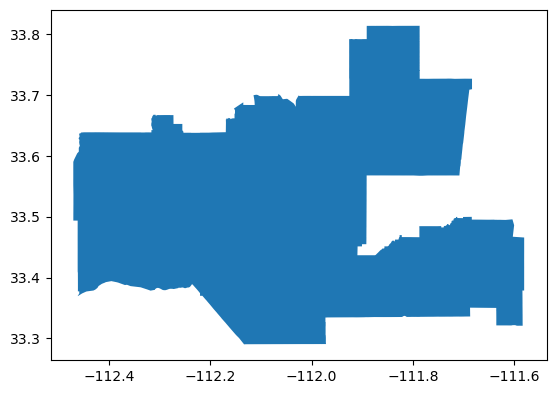

In [6]:
# Create a reproducible file path
fp = os.path.join("data", "tl_2020_04_cousub", "tl_2020_04_cousub.shp")

# Import and read Arizona shapefile
arizona = gpd.read_file(fp)

# Filter Phoenix polygon
phoenix = arizona[arizona["NAME"] == "Phoenix"]

# Plot Phoenix polygon
phoenix.plot()